# Péndulo Doble 

El péndulo doble es un sistema dinámico que consiste en dos péndulos unidos de manera secuencial. Su comportamiento es no lineal y, en general, caótico para ciertos valores de energía.

### **Planteamiento del problema**  
Consideremos un péndulo doble compuesto por dos masas $m_1$ y $m_2$ unidas mediante varillas de longitudes $l_1$ y $l_2$, respectivamente. Los ángulos de desplazamiento de cada masa desde la vertical son $\theta_1$ y $\theta_2$.

Consideraciones:  
- Las varillas son de masa despreciable.  
- El sistema está restringido al plano bidimensional.  
- La gravedad actúa con aceleración $g$.  

### **1. Energía Cinética y Energía Potencial**
Para obtener las ecuaciones de movimiento, utilizamos la formulación de Lagrange. Definimos la energía cinética $T$ y la energía potencial $U$.

#### **Posiciones de las masas en coordenadas cartesianas**  
La posición de cada masa en función de los ángulos $\theta_1$ y $\theta_2$ es:

$$x_1 = l_1 \sin \theta_1, \quad y_1 = -l_1 \cos \theta_1$$

$$x_2 = l_1 \sin \theta_1 + l_2 \sin \theta_2, \quad y_2 = -l_1 \cos \theta_1 - l_2 \cos \theta_2$$

#### **Velocidades de las masas**  
Derivando respecto al tiempo:

$$\dot{x}_1 = l_1 \cos \theta_1 \dot{\theta}_1, \quad \dot{y}_1 = l_1 \sin \theta_1 \dot{\theta}_1 $$

$$\dot{x}_2 = l_1 \cos \theta_1 \dot{\theta}_1 + l_2 \cos \theta_2 \dot{\theta}_2, \quad
\dot{y}_2 = l_1 \sin \theta_1 \dot{\theta}_1 + l_2 \sin \theta_2 \dot{\theta}_2$$

La energía cinética total es:

$$T = \frac{1}{2} m_1 (\dot{x}_1^2 + \dot{y}_1^2) + \frac{1}{2} m_2 (\dot{x}_2^2 + \dot{y}_2^2)$$

Expandiendo:

$$T = \frac{1}{2} m_1 (l_1^2 \dot{\theta}_1^2) + \frac{1}{2} m_2 [(l_1^2 \dot{\theta}_1^2 + l_2^2 \dot{\theta}_2^2 + 2 l_1 l_2 \dot{\theta}_1 \dot{\theta}_2 \cos (\theta_1 - \theta_2))] $$

La energía potencial es:

$$U = -m_1 g l_1 \cos \theta_1 - m_2 g (l_1 \cos \theta_1 + l_2 \cos \theta_2)$$

### **2. Obtención de las Ecuaciones de Movimiento**
El Lagrangiano es: $L = T - U$

Usamos la ecuación de Euler-Lagrange:

$$\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}_i} \right) - \frac{\partial L}{\partial \theta_i} = 0, \quad i = 1,2 $$
Tras desarrollar los términos, obtenemos las ecuaciones de movimiento:

$$(m_1 + m_2) l_1 \ddot{\theta}_1 + m_2 l_2 \ddot{\theta}_2 \cos (\theta_1 - \theta_2) + m_2 l_2 \dot{\theta}_2^2 \sin (\theta_1 - \theta_2) + (m_1 + m_2) g \sin \theta_1 = 0 $$
    
$$m_2 l_2 \ddot{\theta}_2 + m_2 l_1 \ddot{\theta}_1 \cos (\theta_1 - \theta_2) - m_2 l_1 \dot{\theta}_1^2 \sin (\theta_1 - \theta_2) + m_2 g \sin \theta_2 = 0 $$

Estas ecuaciones forman un sistema acoplado de ecuaciones diferenciales no lineales que describen el movimiento del péndulo doble.

Una vez obtenidas las ecuaciones de movimiento, reordenamos términos y resolvemos para $\ddot{\theta}_1$ y $\ddot{\theta}_2$: 

$$\begin{aligned}
    \ddot{\theta}_1 &= \frac{-g(2m_1 + m_2) \sin \theta_1 - m_2 g \sin(\theta_1 - 2\theta_2) - 2 \sin(\theta_1 - \theta_2) m_2 \left(\dot{\theta}_2^2 l_2 + \dot{\theta}_1^2 l_1 \cos(\theta_1 - \theta_2)\right)}{l_1(2m_1 + m_2 - m_2 \cos(2\theta_1 - 2\theta_2))}
    \\
    \ddot{\theta}_2 &= \frac{2 \sin(\theta_1 - \theta_2) \left( \dot{\theta}_1^2 l_1 (m_1 + m_2) + g (m_1 + m_2) \cos\theta_1 + \dot{\theta}_2^2 l_2 m_2 \cos(\theta_1 - \theta_2) \right)}{l_2(2m_1 + m_2 - m_2 \cos(2\theta_1 - 2\theta_2))}
\end{aligned}
$$

### 3. Expresar como sistema de primer orden

Con lo anterior, para usar el método de Runge-Kutta para resolver las ecuaciones, las transformamos a un sistema de primer orden introduciendo variables auxiliares: 

$$\begin{aligned}
    x_1 &= \theta_1, \quad x_2 = \dot{\theta}_1, \quad x_3 = \theta_2, \quad x_4 = \dot{\theta}_2
\end{aligned} $$

y escribimos el sistema en términos de estas variables:

$$\begin{aligned}
    \frac{dx_1}{dt} &= x_2 \\
    \frac{dx_2}{dt} &= \ddot{\theta}_1 \\
    \frac{dx_3}{dt} &= x_4 \\
    \frac{dx_4}{dt} &= \ddot{\theta}_2
\end{aligned} $$

donde $\ddot{\theta}_1$ y $\ddot{\theta}_2$ se obtienen de las ecuaciones de movimiento.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from double_pendulum_system import System, main

In [16]:
def load_data(file_path="data/data.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, theta1, omega1, theta2, omega2, E_kin, E_pot, E_total = data.T
    return t, theta1, omega1, theta2, omega2, E_kin, E_pot, E_total

In [28]:
# Plotting functions

def compute_cartesian_coords(theta1, theta2, L1, L2):
    """Convierte coordenadas angulares a cartesianas"""
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    
    return x1, y1, x2, y2

def plot_trajectories(theta1, theta2, L1=1, L2=1):
    """Grafica las trayectorias de ambas masas en el espacio cartesiano."""
    x1, y1, x2, y2 = compute_cartesian_coords(theta1, theta2, L1, L2)

    plt.figure(figsize=(8, 6))
    
    plt.plot(x1, y1, label="Masa 1 (Extremo superior)", color="b")
    plt.plot(x2, y2, label="Masa 2 (Extremo inferior)", color="r")
    
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.title("Trayectorias de las masas")
    plt.legend()
    plt.grid()
    plt.axis("equal")  # Para que las escalas sean proporcionales
    
    plt.show()


def plot_positions(t, theta1, theta2):
    """Grafica las posiciones de las masas en un subplot 2x1."""
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    axs[0].plot(t, theta1, label=r"$\theta_1$", color="b")
    axs[0].set_ylabel(r"$\theta_1$ (rad)")
    axs[0].legend()
    
    axs[1].plot(t, theta2, label=r"$\theta_2$", color="r")
    axs[1].set_ylabel(r"$\theta_2$ (rad)")
    axs[1].set_xlabel("Tiempo (s)")
    axs[1].legend()
    
    plt.suptitle("Posición angular de las masas")
    plt.show()

def plot_theta1_vs_theta2(theta1, theta2):
    """Grafica theta_1 vs theta_2."""
    plt.figure(figsize=(6, 6))
    plt.plot(theta1, theta2, color="purple")
    plt.xlabel(r"$\theta_1$ (rad)")
    plt.ylabel(r"$\theta_2$ (rad)")
    plt.title(r"$\theta_1$ vs $\theta_2$")
    plt.grid()
    plt.show()

def plot_phase_space(t, theta1, omega1, theta2, omega2):
    """Grafica los espacios fase en subplots 2x1."""
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    axs[0].plot(theta1, omega1, label=r"$\theta_1$ vs $\omega_1$", color="blue")
    axs[0].set_ylabel(r"$\omega_1$ (rad/s)")
    axs[0].legend()
    
    axs[1].plot(theta2, omega2, label=r"$\theta_2$ vs $\omega_2$", color="red")
    axs[1].set_ylabel(r"$\omega_2$ (rad/s)")
    axs[1].set_xlabel(r"$\theta$ (rad)")
    axs[1].legend()
    
    plt.suptitle("Espacio fase de cada masa")
    plt.show()

def plot_energy(t, E_kin, E_pot, E_total):
    """Grafica la energía cinética y potencial en un subplot 2x1."""
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    axs[0].plot(t, E_kin, label="Energía Cinética", color="green")
    axs[0].plot(t, E_pot, label="Energía Potencial", color="orange", linestyle="--")
    axs[0].set_ylabel("Energía (J)")
    axs[0].legend()
    
    axs[1].plot(t, E_total, label="Energía Total", color="black")
    axs[1].set_ylabel("Energía (J)")
    axs[1].set_xlabel("Tiempo (s)")
    axs[1].legend()
    
    plt.suptitle("Energía del sistema")
    plt.show()


In [36]:
# Simulation parameters
m1, l1, theta1_init, omega1_init = 2.0, 1.0, np.pi, 0.0
m2, l2, theta2_init, omega2_init = 1.0, 1.0, np.pi / 4, 1.0
dt = 0.01
t_max = 10.0

In [ ]:
main(m1, l1, theta1_init, omega1_init, m2, l2, theta2_init, omega2_init)

NameError: name 'main' is not defined

In [ ]:
# Load data
t, theta1, omega1, theta2, omega2, E_kin, E_pot, E_total = load_data()

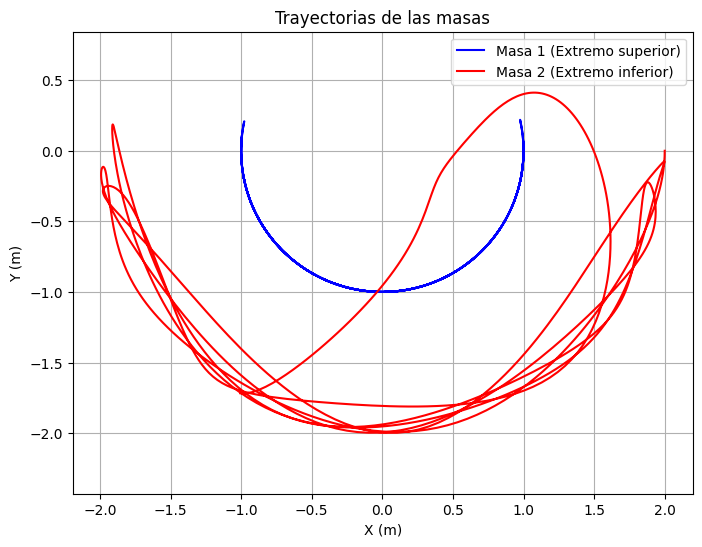

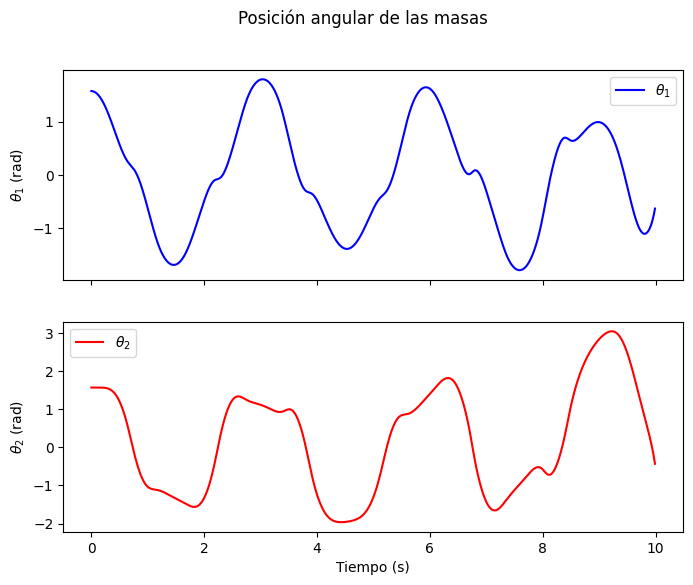

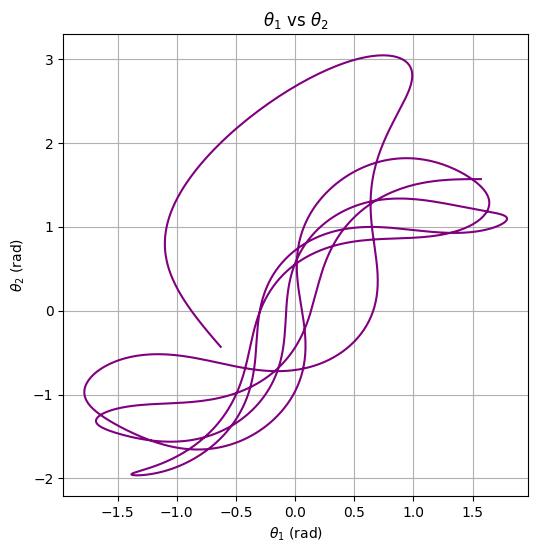

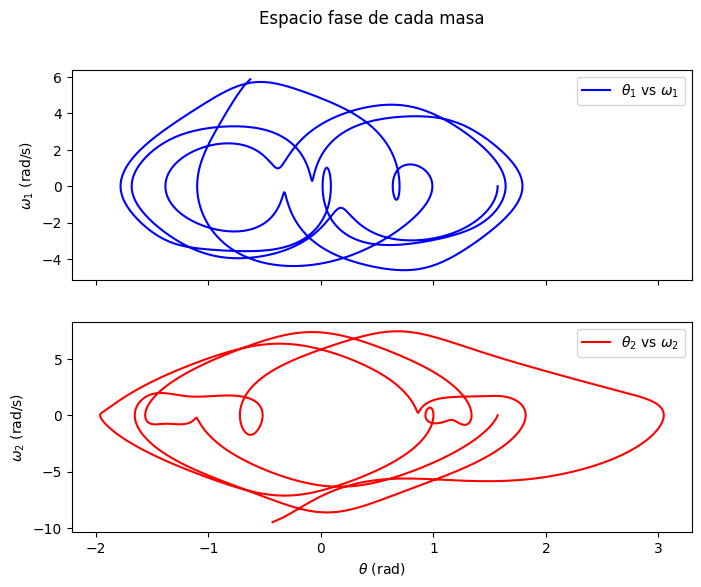

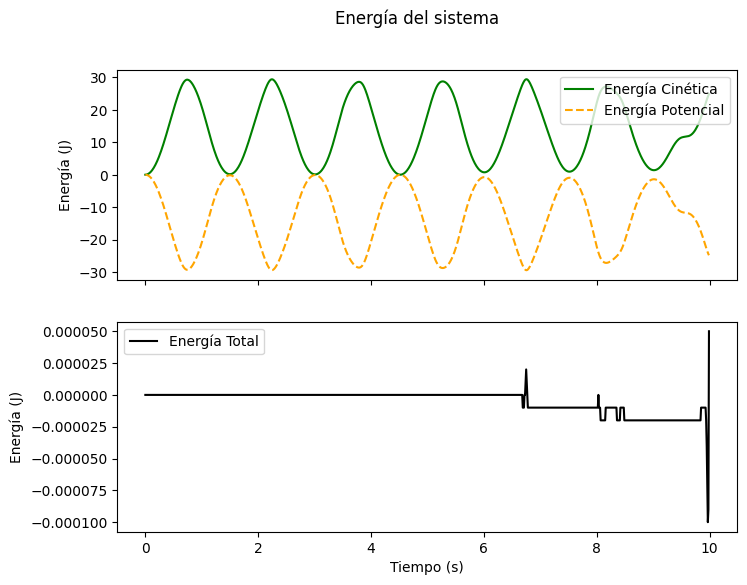

In [7]:
plot_trajectories(theta1, theta2, l1, l2)
plot_positions(t, theta1, theta2)
plot_theta1_vs_theta2(theta1, theta2)
plot_phase_space(t, theta1, omega1, theta2, omega2)
plot_energy(t, E_kin, E_pot, E_total)

## Animation

In [8]:
import matplotlib.animation as animation

In [13]:
class Animator:
    def __init__(self, t, theta1, theta2, L1=1.0, L2=1.0, draw_trace=False):
        self.t = t
        self.theta1 = theta1
        self.theta2 = theta2
        self.L1 = L1
        self.L2 = L2
        self.draw_trace = draw_trace
        self.index = 0  # Índice para recorrer los datos

        # Convertir coordenadas angulares a cartesianas
        self.x1, self.y1, self.x2, self.y2 = self.compute_cartesian_coords()

        # Configuración de la figura
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(-2.5, 2.5)
        self.ax.set_ylim(-2.5, 2.5)

        # Texto para mostrar el tiempo
        self.time_text = self.ax.text(0.05, 0.95, '', 
            horizontalalignment='left', 
            verticalalignment='top', 
            transform=self.ax.transAxes)

        # Dibujar las masas y las líneas del péndulo
        self.line, = self.ax.plot([], [], marker='o', lw=2)
        
        # Si draw_trace es True, dibuja la trayectoria de la segunda masa
        if self.draw_trace:
            self.trace, = self.ax.plot([], [], 'r-', alpha=0.5)

    def compute_cartesian_coords(self):
        """Convierte coordenadas angulares a cartesianas."""
        x1 = self.L1 * np.sin(self.theta1)
        y1 = -self.L1 * np.cos(self.theta1)
        
        x2 = x1 + self.L2 * np.sin(self.theta2)
        y2 = y1 - self.L2 * np.cos(self.theta2)
        
        return x1, y1, x2, y2

    def advance_time_step(self):
        """Generador que recorre los datos precomputados."""
        while self.index < len(self.t):
            yield self.index
            self.index += 1

    def update(self, index):
        """Actualiza la animación en cada frame."""
        self.time_text.set_text(f'Tiempo: {self.t[index]:.2f} s')
        
        # Actualizar la posición del péndulo
        self.line.set_data([0, self.x1[index], self.x2[index]],
                           [0, self.y1[index], self.y2[index]])

        # Actualizar la traza de la segunda masa
        if self.draw_trace:
            self.trace.set_data(self.x2[:index], self.y2[:index])

        return self.line,

    def animate(self):
        """Ejecuta la animación."""
        self.animation = animation.FuncAnimation(
            self.fig, self.update, frames=self.advance_time_step,
            interval=10, blit=False
        )
    
    def save_animation(self, filename="double_pendulum.gif", fps=30):
        writer = animation.PillowWriter(fps=fps)
        self.animation.save(filename, writer=writer)

C:\Users\isaul\AppData\Local\Temp\ipykernel_4828\2334128329.py:64: UserWarning: frames=<bound method Animator.advance_time_step of <__main__.Animator object at 0x000001C2B69B4E00>> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = animation.FuncAnimation(
c:\Users\isaul\Documents\image-processing-main\virt_imp\Lib\site-packages\matplotlib\animation.py:1762: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


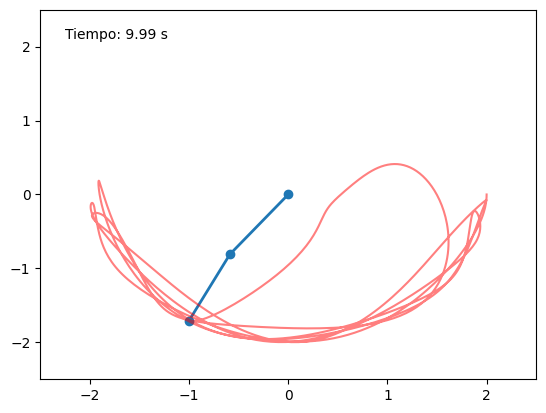

In [14]:
animator = Animator(t, theta1, theta2, draw_trace=True)
animator.animate()
animator.save_animation()

![Péndulo doble](double_pendulum.gif)